In [4]:
import pandas as pd
import numpy as np
db_df=pd.read_csv('diabetes.csv')
db_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import statsmodels.api as sm
X= sm.add_constant(db_df['Glucose'])
X.head(5)

,const,Glucose
0,1.0,148
1,1.0,85
2,1.0,183
3,1.0,89
4,1.0,137


In [7]:
Y=db_df['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)

In [9]:
db=sm.OLS(train_Y,train_X).fit()

In [10]:
print(db.params)

const     -0.518920
Glucose    0.007181
dtype: float64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sn
get_ipython().run_line_magic('matplotlib','inline')

<Figure size 360x360 with 0 Axes>

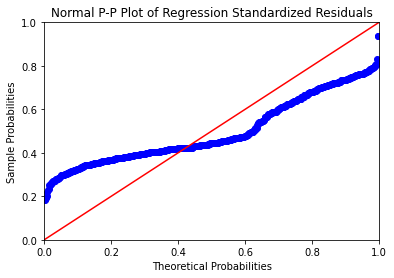

In [29]:
db_resid=db.resid
probplot=sm.ProbPlot(db_resid)
plt.figure(figsize=(5,5))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot of Regression Standardized Residuals")
plt.show()

In [17]:
from scipy.stats import zscore
db_df['z_score_db']=zscore(db_df.Glucose)

In [18]:
db_df[(db_df.z_score_db>3.0)|(db_df.z_score_db<-3.0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z_score_db
75,1,0,48,20,0,24.7,0.140,22,0,-3.783654
182,1,0,74,20,23,27.7,0.299,21,0,-3.783654
342,1,0,68,35,0,32.0,0.389,22,0,-3.783654
349,5,0,80,32,0,41.0,0.346,37,1,-3.783654
502,6,0,68,41,0,39.0,0.727,41,1,-3.783654


In [27]:
db_df[173:200]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,z_score_db
173,1,79,60,42,48,43.5,0.678,23,0,-1.311179
174,2,75,64,24,55,29.7,0.370,33,0,-1.436368
175,8,179,72,42,130,32.7,0.719,36,1,1.818535
176,6,85,78,0,0,31.2,0.382,42,0,-1.123396
177,0,129,110,46,130,67.1,0.319,26,1,0.253678
178,5,143,78,0,0,45.0,0.190,47,0,0.691838
179,5,130,82,0,0,39.1,0.956,37,1,0.284975
180,6,87,80,0,0,23.2,0.084,32,0,-1.060802
181,0,119,64,18,92,34.9,0.725,23,0,-0.059293
182,1,0,74,20,23,27.7,0.299,21,0,-3.783654


In [23]:
pred_y=db.predict(test_X)
pred_y.head()

173    0.048406
253    0.098675
207    0.644458
737   -0.052133
191    0.364385
dtype: float64

In [20]:
from sklearn.metrics import r2_score,mean_squared_error
np.abs(r2_score(test_Y, pred_y))

0.1531864780655796

In [21]:
import numpy
np.sqrt(mean_squared_error(test_Y,pred_y))

0.43719158383907203